In [1]:
from datetime import datetime as dt
import unicodedata
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

import string
from nltk.corpus import stopwords

## Embeddings

We have our data split into monthly data. Now, we are going to start with comparing the embeddings from January 2020 and July 2020. 

### Word2Vec Models

We load our word2vec models trained in `embeddings_wordCategories.ipynb`.

In [3]:
# Create a word2vec model for each month
jan_model = Word2Vec.load("models/jan_model.model")
feb_model = Word2Vec.load("models/feb_model.model")
mar_model = Word2Vec.load("models/mar_model.model")
apr_model = Word2Vec.load("models/apr_model.model")
may_model = Word2Vec.load("models/may_model.model")
june_model = Word2Vec.load("models/june_model.model")
july_model = Word2Vec.load("models/july_model.model")

In this notebook, we will look at a general list of adjectives and see which ones are most associated with the group representational vector for each ethnicity.

## Group Word Lists 

We need to get word lists for both Asian and White names so that we can separate the two from the articles. We get this information from _Word Embeddings Quantify 100 Years of Gender and Ethnic Stereotypes_.

In [4]:
white_last_names = ['harris', 'nelson', 'robinson', 'thompson', 'moore', 'wright', 'anderson', 'clark', 'jackson', 'taylor', 'scott', 'davis',
'allen', 'adams', 'lewis', 'williams', 'jones', 'wilson', 'martin', 'johnson']

len(white_last_names)

20

In [5]:
chinese_last_names = ['chung', 'liu', 'wong', 'huang', 'ng','hu', 'chu', 'chen', 'lin', 'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li']
asian_last_names = ['cho', 'wong', 'tang', 'huang', 'chu', 'chung', 'ng', 'wu', 'liu', 'chen', 'lin', 'yang', 'kim', 'chang', 'shah', 'wang', 'li', 'khan',
'singh', 'hong'] + chinese_last_names

# Get unique last names to avoid any repeats
asian_last_names = np.unique(np.array(asian_last_names))

asian_last_names.shape

(22,)

We have 20 White last names and 22 Asian last names. We get the embeddings for each last name for each month and then we get the group representational vector for each ethnicity.

**White Last Names**

In [6]:
# Get embedding for every word
whiteEmb_jan = np.array([jan_model.wv[name] for name in white_last_names])
whiteEmb_feb = np.array([feb_model.wv[name] for name in white_last_names])
whiteEmb_mar = np.array([mar_model.wv[name] for name in white_last_names])
whiteEmb_apr = np.array([apr_model.wv[name] for name in white_last_names])
whiteEmb_may = np.array([may_model.wv[name] for name in white_last_names])
whiteEmb_june = np.array([june_model.wv[name] for name in white_last_names])
whiteEmb_july = np.array([july_model.wv[name] for name in white_last_names])

whiteEmb_jan.shape

(20, 100)

In [7]:
whiteGroup_jan = np.mean(whiteEmb_jan, axis=0)
whiteGroup_feb = np.mean(whiteEmb_feb, axis=0)
whiteGroup_mar = np.mean(whiteEmb_mar, axis=0)
whiteGroup_apr = np.mean(whiteEmb_apr, axis=0)
whiteGroup_may = np.mean(whiteEmb_may, axis=0)
whiteGroup_june = np.mean(whiteEmb_june, axis=0)
whiteGroup_july = np.mean(whiteEmb_july, axis=0)

Then, we repeat this process with Asian last names.

**Asian Last Names**

In [8]:
# Get embedding for every word
asianEmb_jan = np.array([jan_model.wv[name] for name in asian_last_names])
asianEmb_feb = np.array([feb_model.wv[name] for name in asian_last_names])
asianEmb_mar = np.array([mar_model.wv[name] for name in asian_last_names])
asianEmb_apr = np.array([apr_model.wv[name] for name in asian_last_names])
asianEmb_may = np.array([may_model.wv[name] for name in asian_last_names])
asianEmb_june = np.array([june_model.wv[name] for name in asian_last_names])
asianEmb_july = np.array([july_model.wv[name] for name in asian_last_names])

asianEmb_jan.shape

(22, 100)

In [9]:
asianGroup_jan = np.mean(asianEmb_jan, axis=0)
asianGroup_feb = np.mean(asianEmb_feb, axis=0)
asianGroup_mar = np.mean(asianEmb_mar, axis=0)
asianGroup_apr = np.mean(asianEmb_apr, axis=0)
asianGroup_may = np.mean(asianEmb_may, axis=0)
asianGroup_june = np.mean(asianEmb_june, axis=0)
asianGroup_july = np.mean(asianEmb_july, axis=0)

## Other Word Lists

We get a general list of adjectives from.

In [10]:
adjectives = pd.read_csv('data/adjectiveslist.csv', header=None)
adjectives.head()

,0
0,headstrong
1,thankless
2,tactful
3,distrustful
4,quarrelsome


In [11]:
adjectives.shape

(653, 1)

We have 653 adjectives compiled from `Word embeddings quantify 100 years of gender and ethnic stereotypes`. Now, we first make sure there are no duplicates.

In [12]:
len(np.unique(adjectives.values))

502

We only have 502 unique words so we take this subset and will get the embeddings based on these words.

In [13]:
np.unique(adjectives.values)[:5]

array(['FALSE', 'abrupt', 'accessible', 'active', 'adaptable'],
      dtype=object)

We remove 'FALSE' as an adjective and after viewing the remaining words, the rest are valid adjectives.

In [14]:
adj = np.unique(adjectives.values)[1:]
adj[:5]

array(['abrupt', 'accessible', 'active', 'adaptable', 'admirable'],
      dtype=object)

**Check which words are in all of the months**

In [15]:
jan_words = jan_model.wv.key_to_index
feb_words = feb_model.wv.key_to_index
mar_words = mar_model.wv.key_to_index
apr_words = apr_model.wv.key_to_index
may_words = may_model.wv.key_to_index
june_words = june_model.wv.key_to_index
july_words = july_model.wv.key_to_index

In [16]:
def check_words(lst):
    final_lst = []
    for word in lst:
        if (word in jan_words) & (word in feb_words) & (word in mar_words) & (word in apr_words) & (word in may_words) & (word in june_words) & (word in july_words):
            final_lst.append(word)
    return final_lst

In [17]:
adj_lst = check_words(adj)
len(adj_lst)

325

We now only have 325 words which is half of the list that we started with but this is still a large list of adjectives in comparison to our COVID-19, hate crime and outsider adjectives.

These are the words that appear in every month of data. Next, we get the embeddings for each of these words.

## Embeddings

In [18]:
def get_embeddings(lst, model):
    emb_lst = []
    for word in lst:
        embs = []
        emb = model.wv[word]
        emb_lst.append(emb)
    return emb_lst

In [19]:
# January
adjEmb_jan = np.array(get_embeddings(adj_lst, jan_model))

# February
adjEmb_feb = np.array(get_embeddings(adj_lst, feb_model))

# March
adjEmb_mar = np.array(get_embeddings(adj_lst, mar_model))

# April
adjEmb_apr = np.array(get_embeddings(adj_lst, apr_model))

# May
adjEmb_may = np.array(get_embeddings(adj_lst, may_model))

# June
adjEmb_june = np.array(get_embeddings(adj_lst, june_model))

# July
adjEmb_july = np.array(get_embeddings(adj_lst, july_model))

## Embedding Similarity
Now, for each of these words, we can compute the association with the words in each category and the group representational vector for Asian and White last names. The goal here is different than the goal with the COVID, hate crime and outsider words. These adjectives do not belong to the same category so rather than seeing which has a higher association with a category, we want to see which 10 words are most associated with each ethnicity over time and then see if we can observe any trends.

Hence, we will have two comparisons:
1. Compare the most associated words with Asian ethnicities and White ethnicities
2. Investigate the sentiment behind the most biased adjectives towards Asians (relative to Whites)

In [20]:
# Similarity with Asian vector
adjAsian_jan = np.linalg.norm(adjEmb_jan - asianGroup_jan, axis=1)
adjAsian_feb = np.linalg.norm(adjEmb_feb - asianGroup_feb, axis=1)
adjAsian_mar = np.linalg.norm(adjEmb_mar - asianGroup_mar, axis=1)
adjAsian_apr = np.linalg.norm(adjEmb_apr - asianGroup_apr, axis=1)
adjAsian_may = np.linalg.norm(adjEmb_may - asianGroup_may, axis=1)
adjAsian_june = np.linalg.norm(adjEmb_june - asianGroup_june, axis=1)
adjAsian_july = np.linalg.norm(adjEmb_july - asianGroup_july, axis=1)

In [21]:
# Similarity with White vector
adjWhite_jan = np.linalg.norm(adjEmb_jan - whiteGroup_jan, axis=1)
adjWhite_feb = np.linalg.norm(adjEmb_feb - whiteGroup_feb, axis=1)
adjWhite_mar = np.linalg.norm(adjEmb_mar - whiteGroup_mar, axis=1)
adjWhite_apr = np.linalg.norm(adjEmb_apr - whiteGroup_apr, axis=1)
adjWhite_may = np.linalg.norm(adjEmb_may - whiteGroup_may, axis=1)
adjWhite_june = np.linalg.norm(adjEmb_june - whiteGroup_june, axis=1)
adjWhite_july = np.linalg.norm(adjEmb_july - whiteGroup_july, axis=1)

In [22]:
# Calculate the embedding bias for each word 
adjDiff_jan = adjAsian_jan - adjWhite_jan
adjDiff_feb = adjAsian_feb - adjWhite_feb
adjDiff_mar = adjAsian_mar - adjWhite_mar
adjDiff_apr = adjAsian_apr - adjWhite_apr
adjDiff_may = adjAsian_may - adjWhite_may 
adjDiff_june = adjAsian_june - adjWhite_june
adjDiff_july = adjAsian_july - adjWhite_july

For the embedding bias, we want words that are more associated with Asian ethnicities (i.e. the most biased) so these would be words that are more negative.

In [23]:
adjAsian_jan.shape

(325,)

In [24]:
def top_k_words(arr, k):
    indx = sorted(range(len(arr)), key = lambda sub: arr[sub])[:k]
    closest_words = np.array(adj_lst)[indx]
    return closest_words

In [25]:
df = pd.DataFrame(columns=['Asian', 'White', 'Biased'], index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July'])
df.head()

,Asian,White,Biased
Jan,NaN,NaN,NaN
Feb,NaN,NaN,NaN
Mar,NaN,NaN,NaN
Apr,NaN,NaN,NaN
May,NaN,NaN,NaN


In [26]:
df.loc['Jan', 'Asian'] = top_k_words(adjAsian_jan, 10)
df.loc['Jan', 'White'] = top_k_words(adjWhite_jan, 10)
df.loc['Jan', 'Biased'] = top_k_words(adjDiff_jan, 10)

df.loc['Feb', 'Asian'] = top_k_words(adjAsian_feb, 10)
df.loc['Feb', 'White'] = top_k_words(adjWhite_feb, 10)
df.loc['Feb', 'Biased'] = top_k_words(adjDiff_feb, 10)

df.loc['Mar', 'Asian'] = top_k_words(adjAsian_mar, 10)
df.loc['Mar', 'White'] = top_k_words(adjWhite_mar, 10)
df.loc['Mar', 'Biased'] = top_k_words(adjDiff_mar, 10)

df.loc['Apr', 'Asian'] = top_k_words(adjAsian_apr, 10)
df.loc['Apr', 'White'] = top_k_words(adjWhite_apr, 10)
df.loc['Apr', 'Biased'] = top_k_words(adjDiff_apr, 10)

df.loc['May', 'Asian'] = top_k_words(adjAsian_may, 10)
df.loc['May', 'White'] = top_k_words(adjWhite_may, 10)
df.loc['May', 'Biased'] = top_k_words(adjDiff_may, 10)

df.loc['June', 'Asian'] = top_k_words(adjAsian_june, 10)
df.loc['June', 'White'] = top_k_words(adjWhite_june, 10)
df.loc['June', 'Biased'] = top_k_words(adjDiff_june, 10)

df.loc['July', 'Asian'] = top_k_words(adjAsian_july, 10)
df.loc['July', 'White'] = top_k_words(adjWhite_july, 10)
df.loc['July', 'Biased'] = top_k_words(adjDiff_july, 10)

In [27]:
df

,Asian,White,Biased
Jan,"[adventurous, witty, charming, arrogant, lazy,...","[witty, outspoken, lazy, circumspect, arrogant...","[protective, praising, cerebral, affected, sus..."
Feb,"[solemn, amusing, callous, honorable, sober, c...","[witty, queer, amusing, circumspect, shrewd, d...","[forceful, cerebral, impractical, deliberate, ..."
Mar,"[assertive, methodical, witty, restrained, sol...","[witty, dissatisfied, assertive, solemn, hyste...","[artificial, transparent, informal, sensitive,..."
Apr,"[reactionary, inhibited, circumspect, solemn, ...","[honorable, solemn, fiery, unfathomable, circu...","[predatory, restrained, thorough, cooperative,..."
May,"[callous, honorable, circumspect, monstrous, a...","[honorable, monstrous, amusing, circumspect, d...","[insulting, malicious, transparent, cooperativ..."
June,"[hysterical, circumspect, perverse, reactionar...","[witty, cheerful, hysterical, honorable, disco...","[assertive, deceptive, sensitive, malicious, r..."
July,"[unfathomable, ingenious, reactionary, decepti...","[honorable, unfathomable, solemn, ingenious, w...","[malicious, cooperative, assertive, arbitrary,..."


## Exploration

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

We're going to use a sentiment analyzer to see the average sentiment associated around the top 10 words for each ethnicity. 

In [29]:
def get_sentiment(lst):
    sentiment = []
    for word in lst:
        sentiment.append(sia.polarity_scores(word)['compound'])
    avg_sentiment = np.mean(np.array(sentiment))
    
    return avg_sentiment

In [30]:
df['avg_asian_sentiment'] = df.Asian.apply(get_sentiment)
df['avg_white_sentiment'] = df.White.apply(get_sentiment)
df['avg_bias_sentiment'] = df.Biased.apply(get_sentiment)

In [31]:
df.head()

,Asian,White,Biased,avg_asian_sentiment,avg_white_sentiment,avg_bias_sentiment
Jan,"[adventurous, witty, charming, arrogant, lazy,...","[witty, outspoken, lazy, circumspect, arrogant...","[protective, praising, cerebral, affected, sus...",0.03150,-0.05487,0.13568
Feb,"[solemn, amusing, callous, honorable, sober, c...","[witty, queer, amusing, circumspect, shrewd, d...","[forceful, cerebral, impractical, deliberate, ...",0.12081,0.04225,-0.08504
Mar,"[assertive, methodical, witty, restrained, sol...","[witty, dissatisfied, assertive, solemn, hyste...","[artificial, transparent, informal, sensitive,...",0.04768,-0.05535,0.02500
Apr,"[reactionary, inhibited, circumspect, solemn, ...","[honorable, solemn, fiery, unfathomable, circu...","[predatory, restrained, thorough, cooperative,...",0.03624,0.07222,-0.06734
May,"[callous, honorable, circumspect, monstrous, a...","[honorable, monstrous, amusing, circumspect, d...","[insulting, malicious, transparent, cooperativ...",0.09380,0.14406,0.00484


Let's plot the average sentiment over time.

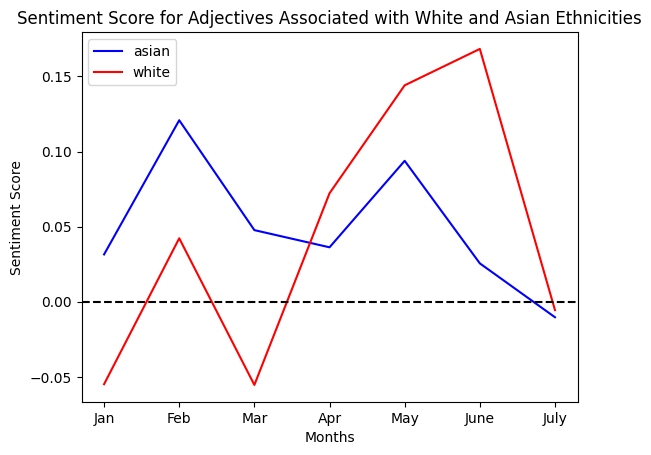

In [32]:
plt.plot(df.index, df.avg_asian_sentiment, label='asian', color='blue')
plt.plot(df.index, df.avg_white_sentiment, label='white', color='red')

plt.xlabel('Months')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score for Adjectives Associated with White and Asian Ethnicities')
plt.axhline(y=0, color='black', linestyle='--')

plt.legend(loc='upper left')
plt.show()

### Biased Terms

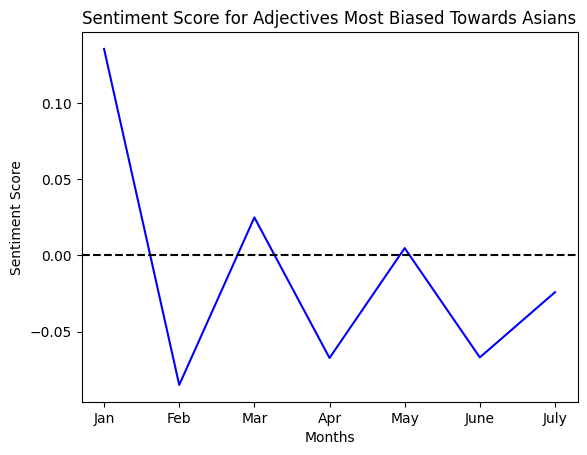

In [33]:
plt.plot(df.index, df.avg_bias_sentiment, color='blue')

plt.xlabel('Months')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score for Adjectives Most Biased Towards Asians')
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

Interestingly, we can see that the sentiment fluctuates for the adjectives more biased towards Asian but we can see a clear trend from January going into negative sentiments or close to a neutral sentiment after COVID begun.